In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import kagglehub, os
import joblib

In [15]:
# Download dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print(" Path to dataset files:", path)
print(" Files available:", os.listdir(path))

Using Colab cache for faster access to the 'fraud-detection' dataset.
 Path to dataset files: /kaggle/input/fraud-detection
 Files available: ['fraudTest.csv', 'fraudTrain.csv']


In [16]:
# Load dataset (use training file)
df = pd.read_csv(os.path.join(path, "fraudTrain.csv"))
print("\n Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())


 Dataset loaded successfully!
Shape: (1296675, 23)
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1   

In [17]:
# Data cleaning
df = df.select_dtypes(include=['int64', 'float64'])
df = df.dropna()
df['is_fraud'] = df['is_fraud'].astype(int)

In [18]:
# Split data
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train models
log_reg = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("\n Training Logistic Regression...")
log_reg.fit(X_train_scaled, y_train)
print("✅ Logistic Regression Trained!")



 Training Logistic Regression...
✅ Logistic Regression Trained!


In [21]:
print("\n Training Random Forest...")
rf.fit(X_train_scaled, y_train)
print("✅ Random Forest Trained!")


 Training Random Forest...
✅ Random Forest Trained!


In [22]:
# Evaluate both models
for name, model in [("Logistic Regression", log_reg), ("Random Forest", rf)]:
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n {name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression Accuracy: 0.9937
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335


 Random Forest Accuracy: 0.9965
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.86      0.48      0.62      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.74      0.81    259335
weighted avg       1.00      1.00      1.00    259335



In [23]:
# Feature importance (for Random Forest)
importances = rf.feature_importances_
features = X.columns

/tmp/ipython-input-3530760253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')


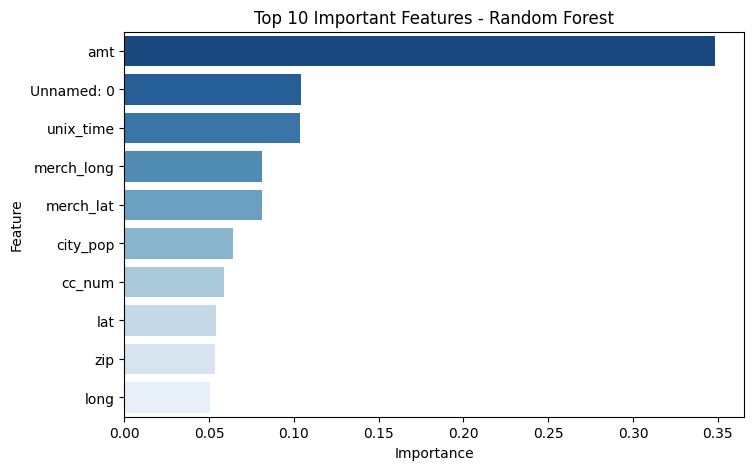

In [24]:
# Show top 10 important features
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title("Top 10 Important Features - Random Forest")
plt.show()

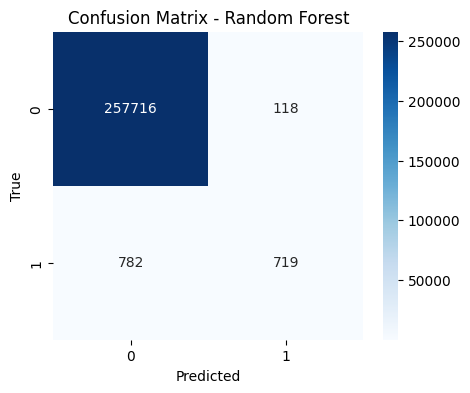

In [25]:
# Step 10: Confusion matrix (for Random Forest)
y_pred_rf = rf.predict(X_test_scaled)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [26]:
# Step 11: Predict sample
sample = X_test.iloc[0].values.reshape(1, -1)
sample_pred = rf.predict(scaler.transform(sample))[0]
print("\n Prediction for one transaction:", "FRAUD" if sample_pred == 1 else "LEGITIMATE")


 Prediction for one transaction: LEGITIMATE


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
